In [ ]:
!pip install torchvision

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets


In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
from torchvision import transforms

In [ ]:
transform1=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize(mean=[0.5],std=[0.5])])

In [ ]:
train_data=datasets.MNIST(root='./data',train=True,download=True,transform=transform1)

100%|██████████| 9.91M/9.91M [00:00<00:00, 125MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 28.6MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 93.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.87MB/s]


In [ ]:
print(len(train_data[0]))
print(train_data[0][0].shape)
print(train_data[0][1])
print(train_data[0][0])

2
torch.Size([1, 28, 28])
5
tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
         [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
          -1.0000, -

In [ ]:
print(len(train_data))

60000


5


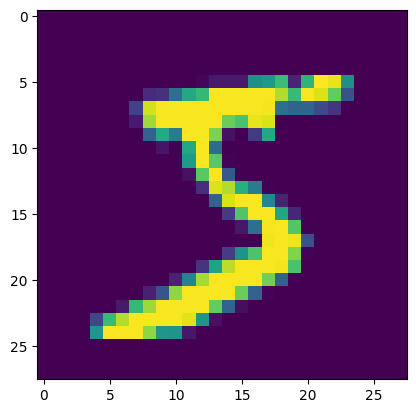

In [ ]:
img=np.array(train_data[0][0].squeeze(0))
print(train_data[0][1])
plt.imshow(img)

In [ ]:
from torch.utils.data import Dataset,DataLoader
train_dataloader=DataLoader(train_data,batch_size=64,shuffle=True)
test_dataloader=DataLoader(test_data,batch_size=64,shuffle=True)

In [ ]:
print(len(train_dataloader))
print(len(test_dataloader))

938
157


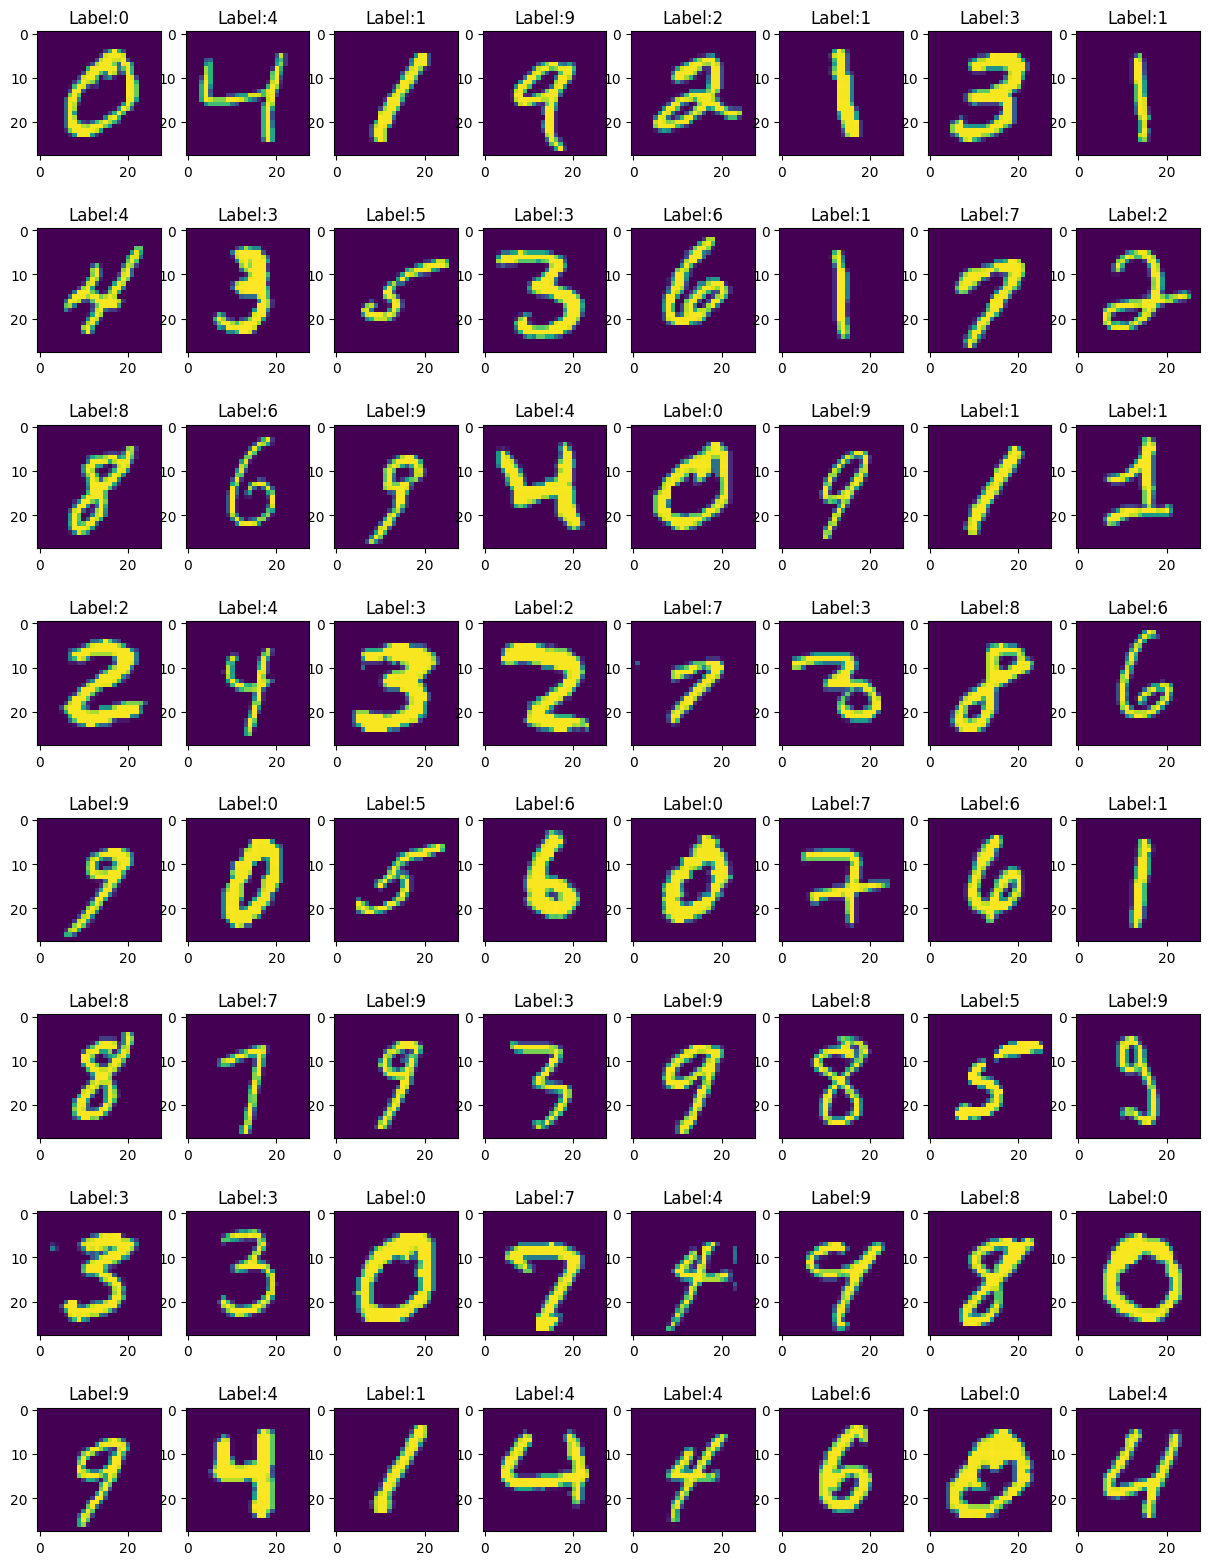

In [ ]:
plt.figure(figsize=(15,20))
for i in range(1,65):
  plt.subplot(8,8,i)
  plt.title(f'Label:{train_data[i][1]}')
  img=np.array(train_data[i][0].squeeze(0))
  plt.imshow(img)

In [ ]:
import torch.nn as nn
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.flatten=nn.Flatten()
    self.fc1=nn.Linear(784,100)
    self.leaky=nn.LeakyReLU()
    self.fc2=nn.Linear(100,30)
    self.fc3=nn.Linear(30,10)
    self.fc4=nn.Linear(10,1)
    self.sig=nn.Sigmoid()
    self.dropout=nn.Dropout(0.5)
  def forward(self,x):
    x=self.flatten(x)
    x=self.fc1(x)
    x=self.leaky(x)
    x=self.dropout(x)
    x=self.fc2(x)
    x=self.leaky(x)
    x=self.dropout(x)
    x=self.fc3(x)
    x=self.leaky(x)
    x=self.dropout(x)
    x=self.fc4(x)
    x=self.sig(x)
    return x


In [ ]:
class Generator(nn.Module):
  def __init__(self):
    super(Generator,self).__init__()
    self.fc1=nn.Linear(100,200)
    self.leaky=nn.LeakyReLU()
    self.fc2=nn.Linear(200,500)
    self.fc3=nn.Linear(500,700)
    self.fc4=nn.Linear(700,784)
    self.tan=nn.Tanh()
  def forward(self,x):
    x=self.fc1(x)
    x=self.leaky(x)
    x=self.fc2(x)
    x=self.leaky(x)
    x=self.fc3(x)
    x=self.leaky(x)
    x=self.fc4(x)
    x=self.tan(x)
    return x


In [ ]:
model1=Discriminator()
model2=Generator()
model1.to(device)
model2.to(device)

Generator(
  (fc1): Linear(in_features=100, out_features=200, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
  (fc2): Linear(in_features=200, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=700, bias=True)
  (fc4): Linear(in_features=700, out_features=784, bias=True)
  (tan): Tanh()
)

In [ ]:
criterion=nn.BCELoss()

In [ ]:
import torch.optim as optim
optimizer1=optim.Adam(model1.parameters(),lr=0.0002)
optimizer2=optim.Adam(model2.parameters(),lr=0.0002)

In [ ]:
num_epochs=20
generator_loss=[]
discriminator_loss=[]

Epoch: [1/20] Batch/Steps: [200/938] Disc. Loss: 0.9598666429519653 Gen. Loss:0.8130739331245422 D(x): 0.7530930638313293 D(G(z)): 0.46120625734329224 
Epoch: [1/20] Batch/Steps: [400/938] Disc. Loss: 1.341961145401001 Gen. Loss:0.8009788393974304 D(x): 0.5775843262672424 D(G(z)): 0.5011959671974182 
Epoch: [1/20] Batch/Steps: [600/938] Disc. Loss: 0.3268778324127197 Gen. Loss:4.793922424316406 D(x): 0.8685667514801025 D(G(z)): 0.12895546853542328 
Epoch: [1/20] Batch/Steps: [800/938] Disc. Loss: 0.5929789543151855 Gen. Loss:3.864058494567871 D(x): 0.7841210961341858 D(G(z)): 0.1914212554693222 
Epoch: [2/20] Batch/Steps: [200/938] Disc. Loss: 0.9716849327087402 Gen. Loss:1.6313666105270386 D(x): 0.6793606281280518 D(G(z)): 0.3176693320274353 
Epoch: [2/20] Batch/Steps: [400/938] Disc. Loss: 1.0918959379196167 Gen. Loss:1.1114259958267212 D(x): 0.5894185900688171 D(G(z)): 0.40005117654800415 
Epoch: [2/20] Batch/Steps: [600/938] Disc. Loss: 1.2463011741638184 Gen. Loss:0.83166718482971

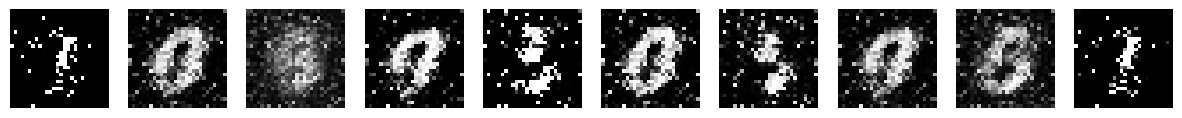

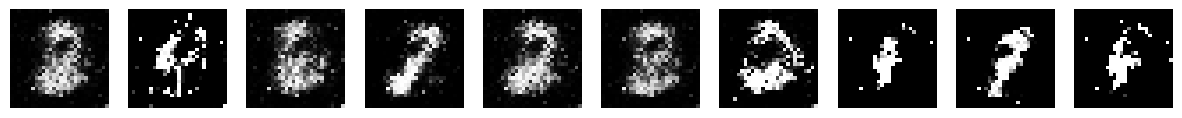

In [ ]:
for epoch in range(num_epochs):
  d_epoch_loss=0
  g_epoch_loss=0


  for i,(images,labels) in enumerate(train_dataloader):
    real_labels=torch.ones(len(images),1)
    fake_labels=torch.zeros(len(images),1)

    #Discriminator Training
    output=model1(images)
    d_real_loss=criterion(output,real_labels)
    real_score=output

    fake_image=model2(torch.randn(len(images),100))
    fake_image=fake_image.reshape(len(images),1,28,28)

    output=model1(fake_image)
    d_fake_loss=criterion(output,fake_labels)
    fake_score=output

    d_loss=d_real_loss+d_fake_loss
    d_epoch_loss+=d_loss.item()
    optimizer1.zero_grad()
    d_loss.backward()
    optimizer1.step()

    #Generation Training

    fake_images=model2(torch.randn(len(images),100))
    fake_images=fake_images.reshape(len(images),1,28,28)
    outputs=model1(fake_images)

    g_loss=criterion(outputs,real_labels)
    g_epoch_loss+=g_loss.item()

    optimizer2.zero_grad()
    g_loss.backward()
    optimizer2.step()

    if (i+1)%200==0:
      print(f'Epoch: [{epoch+1}/{num_epochs}] Batch/Steps: [{i+1}/{len(train_dataloader)}] Disc. Loss: {d_loss.item()} Gen. Loss:{g_loss.item()} D(x): {real_score.mean().item()} D(G(z)): {fake_score.mean().item()} ')

  generator_loss.append(g_epoch_loss/i)
  discriminator_loss.append(d_epoch_loss/i)


  if (epoch+1)%10==0:
    plt.figure(figsize=(15,10))
    for i in range(10):
      plt.subplot(1,10,i+1)
      img=fake_images[i,0].detach().cpu().numpy()
      plt.imshow(img,cmap='gray')
      plt.axis('off')




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls

Mounted at /content/drive/
data  drive  sample_data


In [ ]:
torch.save(model1,'/content/drive/MyDrive/Image_Processing_Class/discriminator.pt')
torch.save(model2,'/content/drive/MyDrive/Image_Processing_Class/generator.pt')

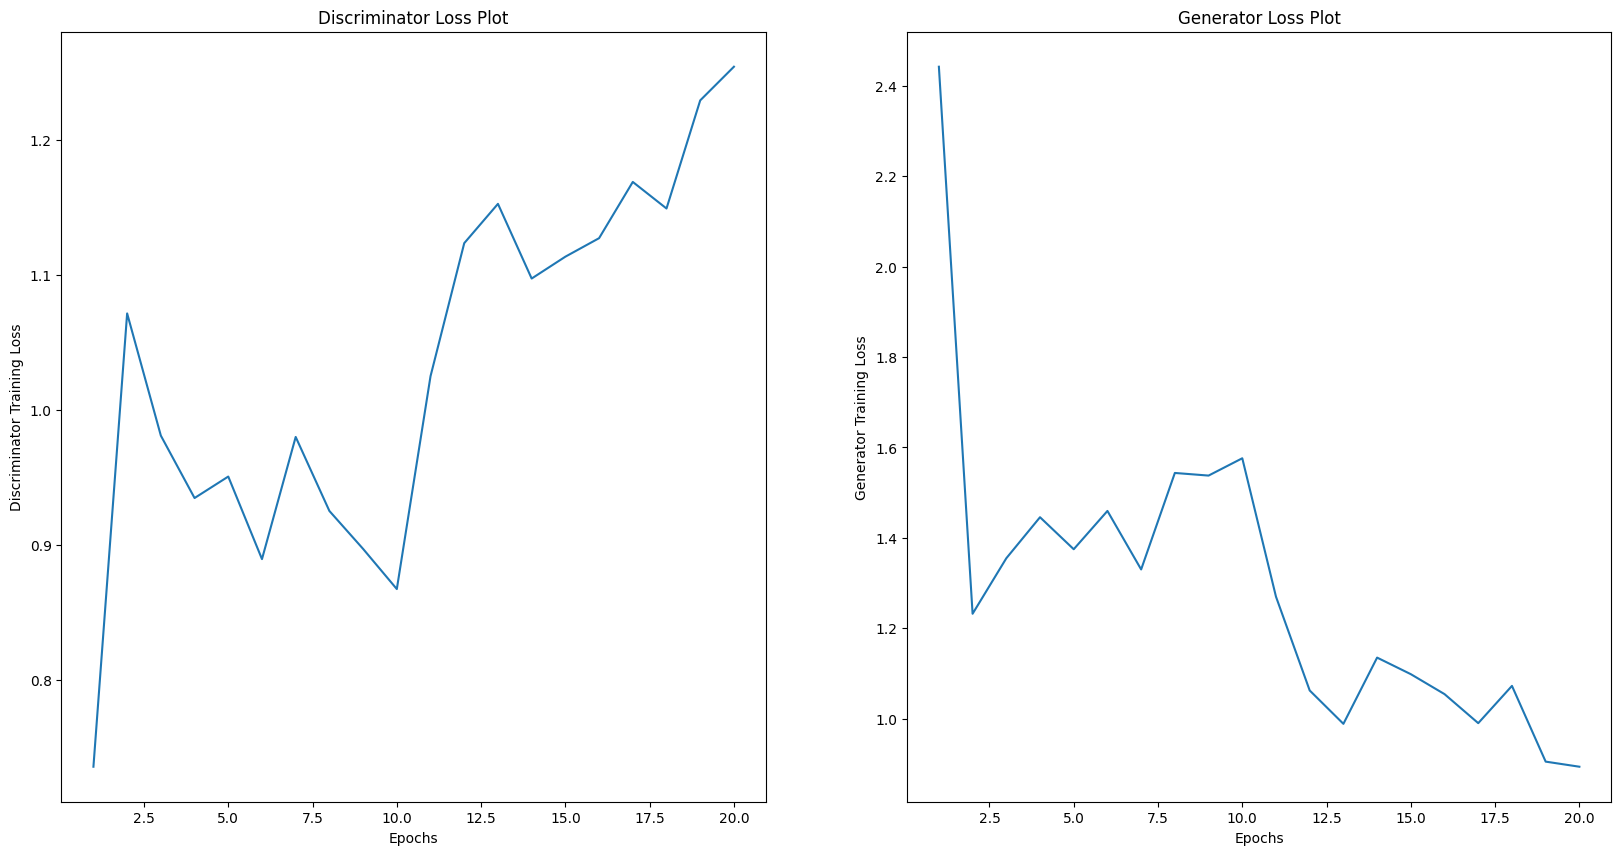

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Discriminator Loss Plot')
train_num_epoch=[i+1 for i in range(len(discriminator_loss))]
plt.plot(train_num_epoch,discriminator_loss)
plt.xlabel('Epochs')
plt.ylabel('Discriminator Training Loss')

plt.subplot(1, 2, 2)
plt.title("Generator Loss Plot")
train_num_epoch = [i + 1 for i in range(len(discriminator_loss))]
plt.plot(train_num_epoch, generator_loss)
plt.xlabel("Epochs")
plt.ylabel("Generator Training Loss")
plt.show()

# Inference

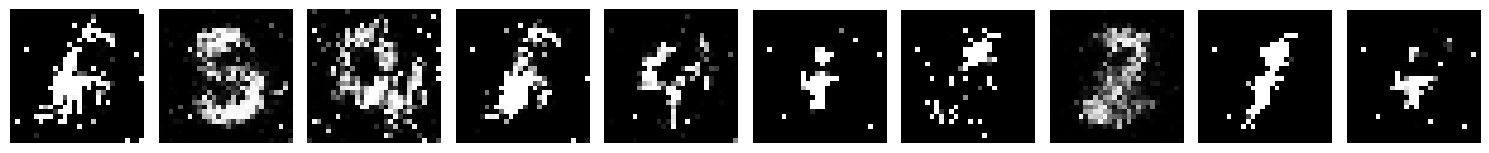

In [ ]:

from torch.serialization import add_safe_globals
from torch.nn import LeakyReLU
import matplotlib.pyplot as plt

add_safe_globals([nn.Linear, LeakyReLU])
generator = torch.load('/content/drive/MyDrive/Image_Processing_Class/generator.pt', weights_only=False)
generator.eval()

num_samples = 10
input_noise = torch.randn(num_samples, 100)
generated_samples = generator(input_noise)
generated_samples = generated_samples.reshape(num_samples, 1, 28, 28)

generated_samples_np = generated_samples.detach().cpu().numpy()
plt.figure(figsize=(15, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(generated_samples_np[i, 0], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
